In [1]:
from utils import *
import glob
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
catch22df = get_problem_features(glob.glob('features/Catch22.csv'))
tsfreshdf = get_problem_features(glob.glob('features/TSFresh.csv'))

fdf = tsfreshdf.join(catch22df)
fdf = fdf.pipe(drop_nan_and_non_unique_columns)

get_problem_features took=0:00:00.991504 shape=(100000, 22)
get_problem_features took=0:00:25.469428 shape=(100000, 789)
drop_nan_and_non_unique_columns took=0:00:02.775754 shape=(100000, 345)


In [3]:
print(len(catch22df.columns))
print(len(tsfreshdf.pipe(drop_nan_and_non_unique_columns).columns))

22
drop_nan_and_non_unique_columns took=0:00:02.212085 shape=(100000, 323)
323


In [4]:
#corr = spearmanr(X).correlation
corr = fdf.corr().to_numpy()
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)
corr = np.minimum(corr, 1)

In [5]:
figures_directory = 'figures'
create_directory_if_not_exist(figures_directory)

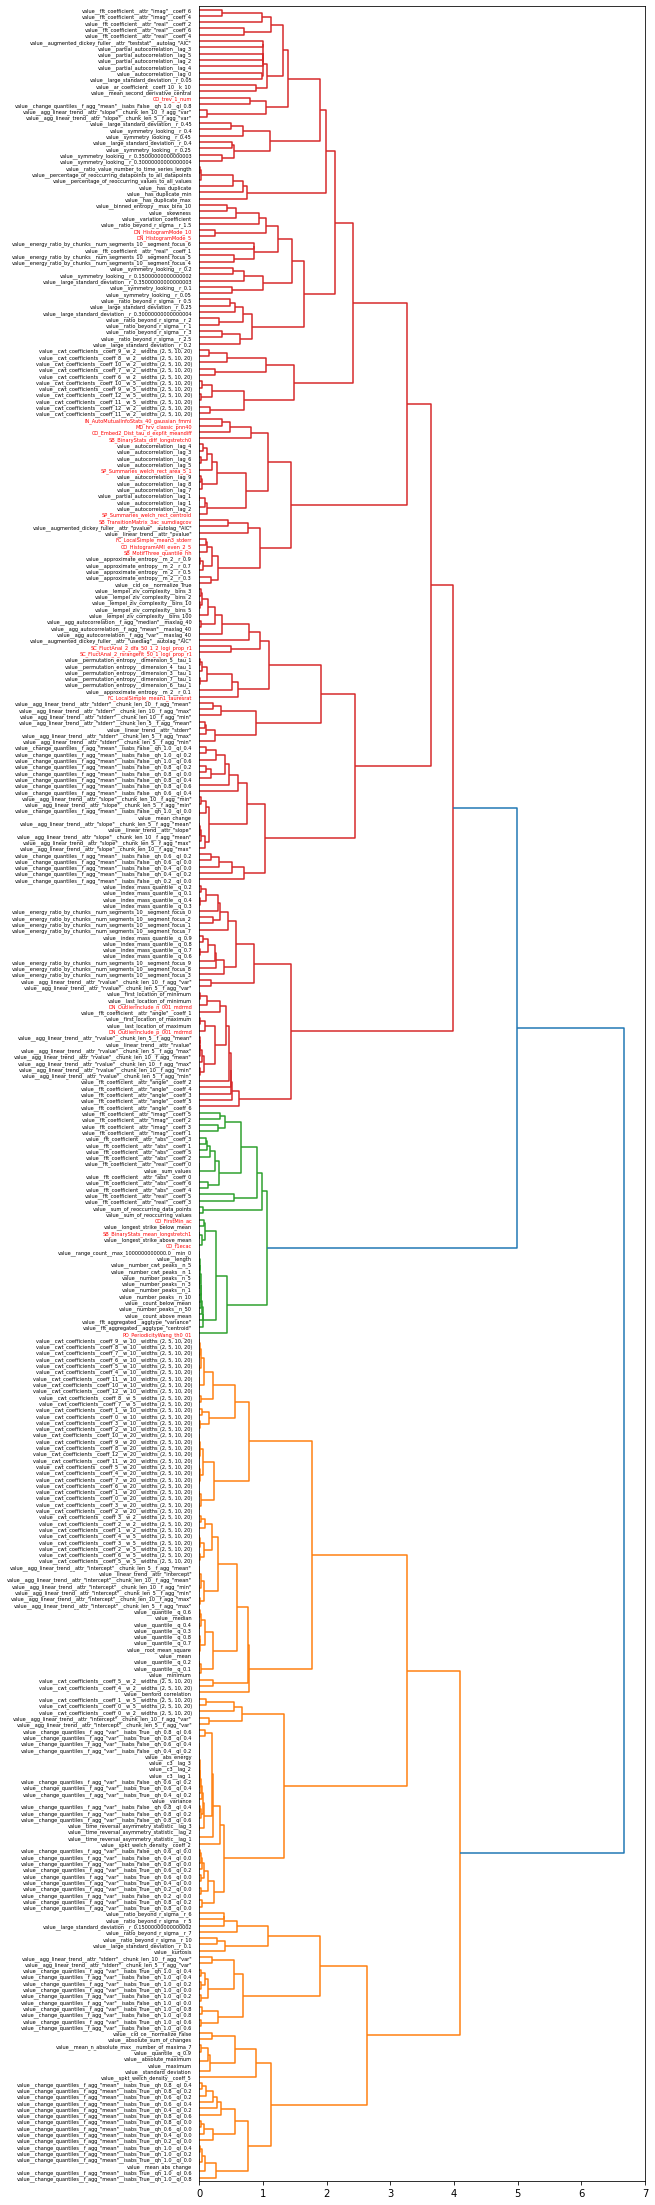

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 40))

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=fdf.columns, ax=ax1, leaf_rotation=0, orientation='right'
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

for xtick, name in zip(ax1.get_yticklabels(), dendro["ivl"]):
    if name in tsfreshdf.columns:
        xtick.set_color('black')
    else:
        xtick.set_color('red')

#plt.show()
plt.savefig(f'{figures_directory}/feature_correlation_histogram.pdf', bbox_inches='tight', pad_inches=0)

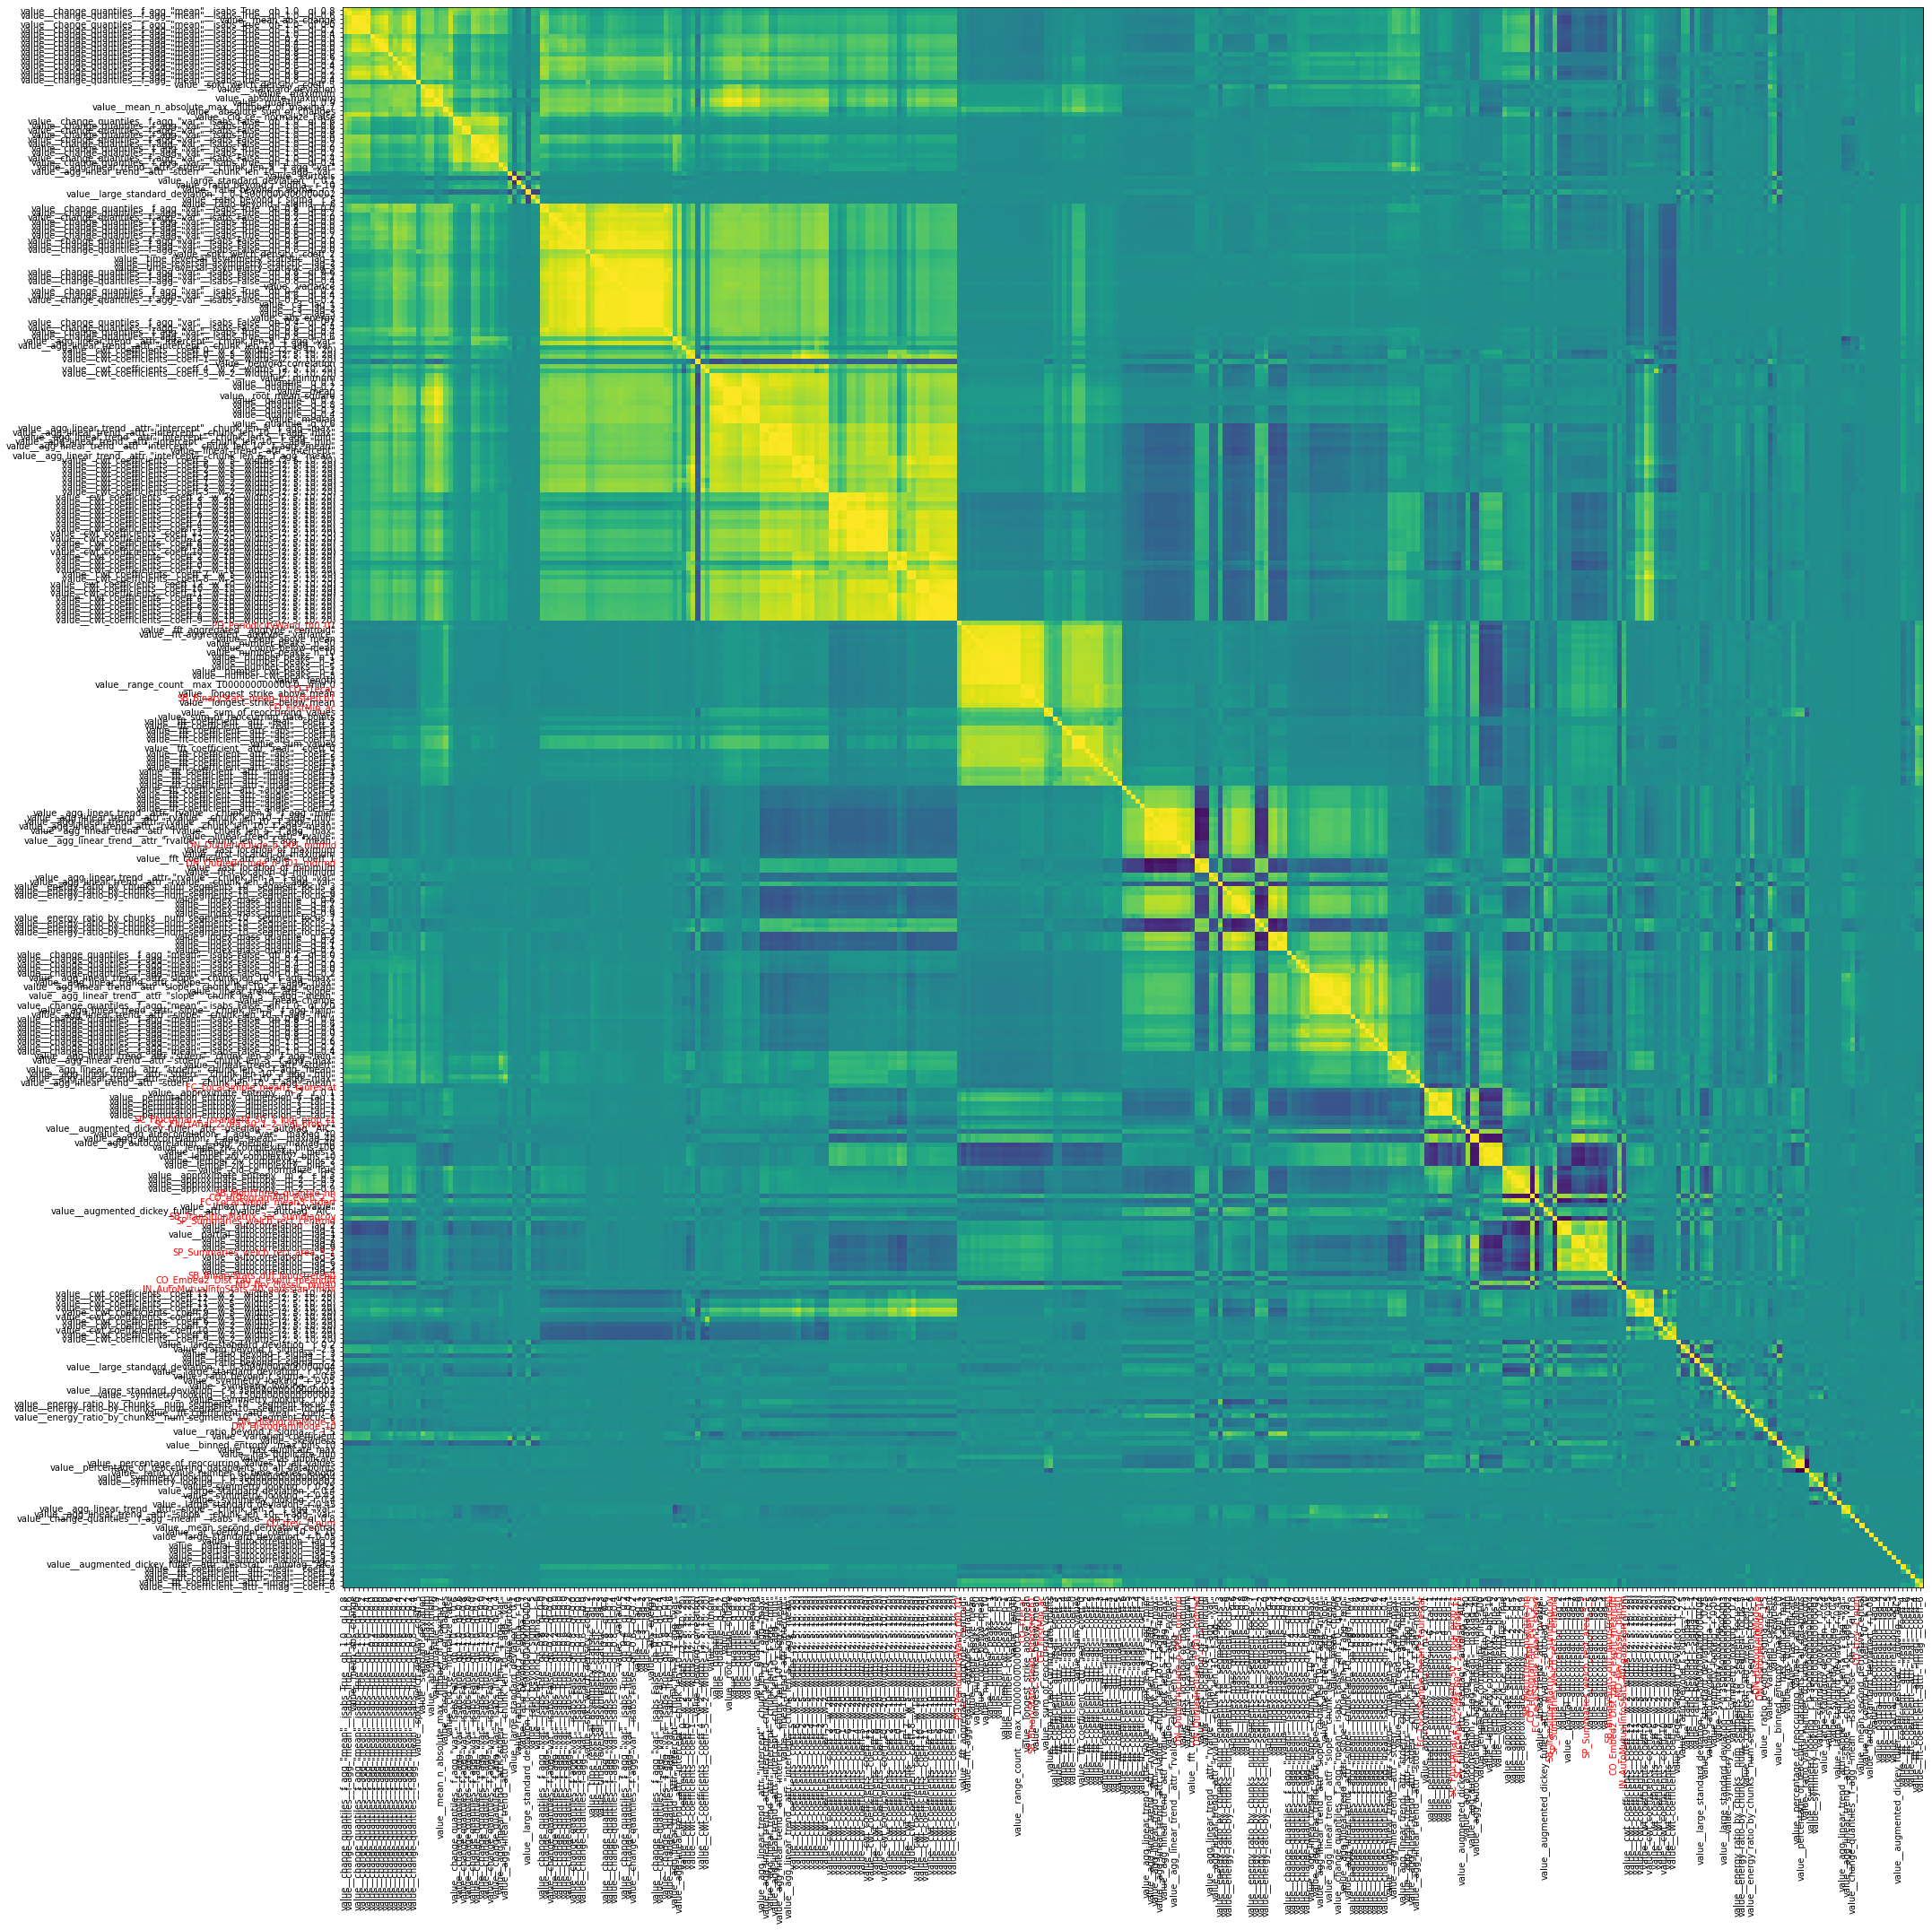

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(30, 30))
ax1.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax1.set_xticks(dendro_idx)
ax1.set_yticks(dendro_idx)
ax1.set_xticklabels(dendro["ivl"], rotation="vertical")
ax1.set_yticklabels(dendro["ivl"])
fig.tight_layout()


for xtick, name in zip(ax1.get_xticklabels(), dendro["ivl"]):
    if name in tsfreshdf.columns:
        xtick.set_color('black')
    else:
        xtick.set_color('red')
        
for ytick, name in zip(ax1.get_yticklabels(), dendro["ivl"]):
    if name in tsfreshdf.columns:
        ytick.set_color('black')
    else:
        ytick.set_color('red')

plt.show()

In [8]:
correlation_list = []
for i, n1 in enumerate(fdf):
    for j, n2 in enumerate(fdf):
        if i != j:
            correlation_list.append((corr[i, j], n1, n2))
correlation_list.sort()

[x for x in correlation_list if x[2]=='value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'][:20]

[(-0.4805236552541575,
  'value__autocorrelation__lag_9',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.4769197477700056,
  'value__autocorrelation__lag_8',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.46675845862374926,
  'value__autocorrelation__lag_7',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.4431400346456803,
  'SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.4409424922808562,
  'value__autocorrelation__lag_6',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.41356541297630944,
  'value__autocorrelation__lag_5',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.40824195503123073,
  'SP_Summaries_welch_rect_area_5_1',
  'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)'),
 (-0.3861627640956357,
  'value__autocorrelation__lag_4',
  'value__cwt_coefficients__coeff_0__w_10__wi

In [9]:
catch22df = get_problem_features(glob.glob('features/Catch22.csv')).pipe(drop_nan_and_non_unique_columns)
tsfreshdf = get_problem_features(glob.glob('features/TSFresh.csv')).pipe(drop_nan_and_non_unique_columns)
catch22df_log = get_problem_features(glob.glob('features/Catch22Log.csv')).pipe(drop_nan_and_non_unique_columns)
tsfreshdf_log = get_problem_features(glob.glob('features/TSFreshLog.csv')).pipe(drop_nan_and_non_unique_columns)
catch22df_diff = get_problem_features(glob.glob('features/Catch22Diff.csv')).pipe(drop_nan_and_non_unique_columns)
tsfreshdf_diff = get_problem_features(glob.glob('features/TSFreshDiff.csv')).pipe(drop_nan_and_non_unique_columns)

get_problem_features took=0:00:00.907236 shape=(100000, 22)
drop_nan_and_non_unique_columns took=0:00:00.101722 shape=(100000, 22)
get_problem_features took=0:00:26.400175 shape=(100000, 789)
drop_nan_and_non_unique_columns took=0:00:02.151728 shape=(100000, 323)
get_problem_features took=0:00:00.846559 shape=(100000, 22)
drop_nan_and_non_unique_columns took=0:00:00.094553 shape=(100000, 22)
get_problem_features took=0:00:25.356802 shape=(100000, 789)
drop_nan_and_non_unique_columns took=0:00:02.222738 shape=(100000, 322)
get_problem_features took=0:00:00.818074 shape=(100000, 22)
drop_nan_and_non_unique_columns took=0:00:00.098952 shape=(100000, 22)
get_problem_features took=0:00:26.044611 shape=(100000, 789)
drop_nan_and_non_unique_columns took=0:00:02.106397 shape=(100000, 330)


In [41]:
from scipy.stats import pearsonr

correlations = {'feature': [], 'log': [], 'diff':[]}

for column in catch22df.columns:
    try:
        a = catch22df[column].to_list()
        b = catch22df_log[f'log_{column}'].to_list()
        c = catch22df_diff[f'diff_{column}'].to_list()
        
        cor_log = pearsonr(a, b)[0]
        cor_diff = pearsonr(a, c)[0]
        
        correlations['feature'].append(column)
        correlations['log'].append(cor_log)
        correlations['diff'].append(cor_diff)
    except:
        pass
    
df_catch = pd.DataFrame(correlations)

In [42]:
df_catch

,feature,log,diff
0,DN_HistogramMode_5,0.312914,0.071453
1,DN_HistogramMode_10,0.344597,0.123157
2,CO_f1ecac,0.992995,-0.042335
3,CO_FirstMin_ac,0.975963,-0.002989
4,CO_HistogramAMI_even_2_5,0.949600,0.015646
5,CO_trev_1_num,0.851677,-0.058585
6,MD_hrv_classic_pnn40,0.965377,0.420100
7,SB_BinaryStats_mean_longstretch1,0.983305,0.160700
8,SB_TransitionMatrix_3ac_sumdiagcov,0.923760,0.179732
9,PD_PeriodicityWang_th0_01,0.841517,0.029730


In [43]:
print(df_catch['log'].abs().min(), df_catch['log'].abs().max(), df_catch['log'].abs().mean())
print(df_catch['diff'].abs().min(), df_catch['diff'].abs().max(), df_catch['diff'].abs().mean())

0.31291403909583626 1.0 0.8840321345163106
0.002989083311574353 0.616725167937264 0.24302641478816048


In [37]:
from scipy.stats import pearsonr

correlations = {'feature': [], 'log': [], 'diff':[]}

for column in tsfreshdf.columns:
    try:
        a = tsfreshdf[column].to_list()
        b = tsfreshdf_log[f'log_{column}'].to_list()
        c = tsfreshdf_diff[f'diff_{column}'].to_list()
        
        cor_log = pearsonr(a, b)[0]
        cor_diff = pearsonr(a, c)[0]
        
        correlations['feature'].append(column)
        correlations['log'].append(cor_log)
        correlations['diff'].append(cor_diff)
    except:
        pass
    
df_tsfresh = pd.DataFrame(correlations)

/opt/conda/envs/Base/lib/python3.9/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [38]:
print(df_tsfresh['log'].abs().min(), df_tsfresh['log'].abs().max(), df_tsfresh['log'].abs().mean())
print(df_tsfresh['diff'].abs().min(), df_tsfresh['diff'].abs().max(), df_tsfresh['diff'].abs().mean())

0.0011507816397402426 1.0 0.6616934716015552
3.316823803929921e-05 0.9999999999999996 0.3487461616151974


In [39]:
#print(df.to_latex())

In [48]:
df_tsfresh.head(50)

,feature,log,diff
0,value__has_duplicate_max,1.000000,0.163485
1,value__has_duplicate_min,1.000000,0.147731
2,value__has_duplicate,1.000000,0.742482
3,value__sum_values,0.839157,0.140367
4,value__abs_energy,0.052480,0.882166
5,value__mean_abs_change,0.733500,0.974967
6,value__mean_change,0.770956,0.072892
7,value__mean_second_derivative_central,0.672145,0.127637
8,value__median,0.707104,0.099158
9,value__mean,0.710061,0.068096
